# CRACKS DETECTION

In [2]:
from matplotlib import pyplot as plt
import cv2
import numpy as np
from PIL import Image
from glob import glob
from tqdm import tqdm

In [3]:
train_dir = 'data/train/'
test_dir = 'data/test/'
val_dir ='data/src/'

# DATA RECOMPRESS

In [4]:
src_data = [file for file in glob(f"{val_dir}*/*")]
src_sizes = [Image.open(f).size for f in src_data]
min_hw = ((min(src_sizes, key=lambda x: x[0])[0], min(src_sizes, key=lambda x: x[1])[1]))
min_hw

(184, 146)

In [5]:
for file in tqdm(glob("data/*/*/*"), "Resizing image"):
    img = Image.open(file)
    img = img.resize(min_hw)
    img.save(file)

Resizing image: 100%|██████████| 1000/1000 [00:01<00:00, 534.64it/s]


#  Image Sample

In [6]:
img_dir = 'data/train/crack/00013.jpeg'
imgss = Image.open(img_dir).convert('L')
np.asarray(imgss)

array([[221, 208, 197, ..., 190, 196, 209],
       [205, 201, 205, ..., 202, 210, 222],
       [214, 214, 220, ..., 192, 207, 225],
       ...,
       [214, 211, 212, ...,  20,   1,   9],
       [195, 206, 194, ...,  99,  30,   1],
       [195, 206, 194, ..., 179, 156, 154]], dtype=uint8)

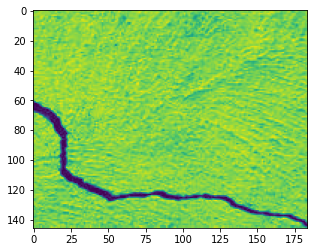

In [7]:
img_dir = 'data/train/crack/00013.jpeg'
image =  plt.imread(img_dir)
#plt.imshow(image)
image = Image.open(img_dir).convert("L")
image = np.asarray(image)
plt.imshow(image)


# Comparison Between Coloured And Grayscale Images

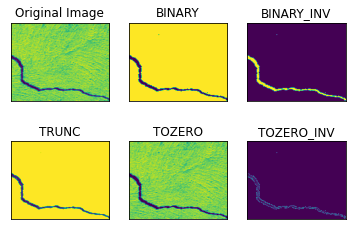

In Grayscale


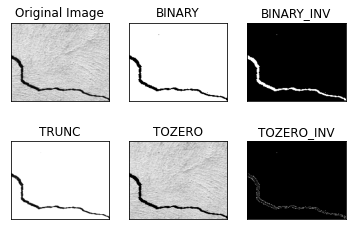

In [8]:
img = cv2.imread(img_dir,0)
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i])
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

print('In Grayscale')
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

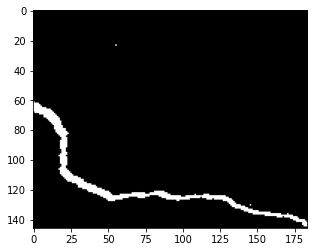

In [9]:
plt.imshow(thresh2, 'gray')

# Functions For Processing Images And Creating Data

In [10]:
def process_image(image):
    ret,bi_inv = cv2.threshold(image,127,255,cv2.THRESH_BINARY_INV)
    #plt.imshow(bi_inv, 'gray')
    return bi_inv, image

def create_data(tdir_, type_, frm, to, t_data):
    colored_data=[]
    bi_inv_data=[]
    print('Working On '+t_data+' Data : '+type_ +'\n')
    rng = ["%05d" % x for x in range(frm, to+1)]
    for i in rng:
        dir_ =tdir_+type_+'/'+i+'.jpeg'
        image = cv2.imread(dir_, 0)
        bi_inv, colored_img = process_image(image)
        colored_data.append(colored_img)
        bi_inv_data.append(bi_inv)   
        
    print('Images Processed from '+rng[0]+' to '+rng[len(rng)-1]+'\n')    
    return colored_data, bi_inv_data

# Training Data : 335 Images

In [11]:
train_data_colr= []
train_labels=[]
train_data_inv = []

train_data_colr_pos, train_data_inv_pos=  create_data(train_dir, 'crack', 1, 165, 'Training')

for i in range(0, len(train_data_colr_pos)):
    train_data_colr.append(train_data_colr_pos[i])
    train_data_inv.append(train_data_inv_pos[i])
    train_labels.append(1)

train_data_colr_neg, train_data_inv_neg=  create_data(train_dir, 'no_crack', 1, 170, 'Training')

for i in range(0, len(train_data_colr_neg)):
    train_data_colr.append(train_data_colr_neg[i])
    train_data_inv.append(train_data_inv_neg[i])
    train_labels.append(0)
    

final_train_colr = np.array(train_data_colr).reshape(((len(train_data_colr), min_hw[0], min_hw[1], 1)))        
final_train_inv = np.array(train_data_inv).reshape(((len(train_data_inv), min_hw[0], min_hw[1], 1)))   

print('Shape of Training Data : '+str(final_train_colr.shape))    

Working On Training Data : crack

Images Processed from 00001 to 00165

Working On Training Data : no_crack

Images Processed from 00001 to 00170

Shape of Training Data : (335, 184, 146, 1)


In [12]:
final_train_inv[0]

array([[[  0],
        [  0],
        [  0],
        ...,
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        ...,
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        ...,
        [  0],
        [  0],
        [  0]],

       ...,

       [[  0],
        [  0],
        [  0],
        ...,
        [255],
        [255],
        [  0]],

       [[  0],
        [  0],
        [  0],
        ...,
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        ...,
        [  0],
        [  0],
        [  0]]], dtype=uint8)

# Cracks Data

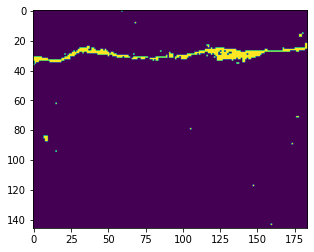

In [13]:
plt.imshow(train_data_inv_pos[13])

# No cracks Data

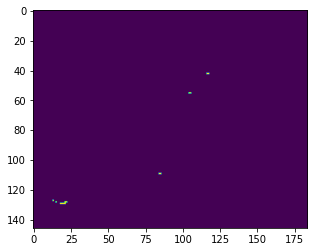

In [14]:
plt.imshow(train_data_inv_neg[6])

# Testing Data : 167 Images

In [15]:
test_data_colr= []
test_labels=[]
test_data_inv = []

test_data_colr_pos, test_data_inv_pos=  create_data(test_dir, 'crack', 1, 85, 'Testing')


for i in range(0, len(test_data_colr_pos)):
    test_data_colr.append(test_data_colr_pos[i])
    test_data_inv.append(test_data_inv_pos[i])
    test_labels.append(1)

test_data_colr_neg, test_data_inv_neg=  create_data(test_dir, 'no_crack', 1, 80, 'Testing')

for i in range(0, len(test_data_colr_neg)):
    test_data_colr.append(test_data_colr_neg[i])
    test_data_inv.append(test_data_inv_neg[i])
    test_labels.append(0)
    
final_test_colr = np.array(test_data_colr).reshape(((len(test_data_colr), min_hw[0], min_hw[1], 1)))    
final_test_inv = np.array(test_data_inv).reshape(((len(test_data_inv), min_hw[0], min_hw[1], 1)))   

print('Shape of Testing Data : '+str(final_test_colr.shape))

Working On Testing Data : crack

Images Processed from 00001 to 00085

Working On Testing Data : no_crack

Images Processed from 00001 to 00080

Shape of Testing Data : (165, 184, 146, 1)


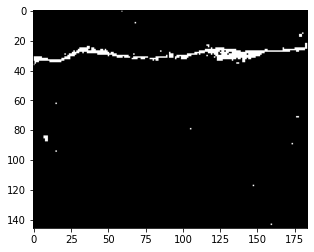

In [16]:
plt.imshow(train_data_inv[13], 'gray')

# Model Creation (Convolutional Neural Networks)

In [17]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.models import load_model
from keras.utils import plot_model


In [18]:
input_shape = (min_hw[0], min_hw[1], 1)
Wh = 3
Ww = 3

In [19]:
input_shape

(184, 146, 1)

In [20]:
model = Sequential()
model.add(Conv2D(input_shape=input_shape , data_format="channels_last", kernel_size=(Wh,Ww), filters=32, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

# model = Sequential()
# model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
# model.add(MaxPooling2D((2, 2)))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D((2, 2)))
# model.add(Conv2D(64, (3, 3), activation='relu'))


In [21]:
batch_size = 50
epochs = 47

# Validation data (100 images)

In [22]:
val_data_colr= []
val_labels=[]
val_data_inv = []

val_data_colr_pos, val_data_inv_pos=  create_data(val_dir, 'crack', 1, 50, 'Validation')


for i in range(0, len(val_data_colr_pos)):
    val_data_colr.append(val_data_colr_pos[i])
    val_data_inv.append(val_data_inv_pos[i])
    val_labels.append(1)

val_data_colr_neg, val_data_inv_neg=  create_data(val_dir, 'no_crack', 251, 300, 'Validation')

for i in range(0, len(val_data_colr_neg)):
    val_data_colr.append(val_data_colr_neg[i])
    val_data_inv.append(val_data_inv_neg[i])
    val_labels.append(0)
    
final_val_colr = np.array(val_data_colr).reshape((len(val_data_colr), min_hw[0], min_hw[1], 1))    
final_val_inv = np.array(val_data_inv).reshape((len(val_data_inv), min_hw[0], min_hw[1], 1))   

print('Shape of Validation Data : '+str(final_val_colr.shape))

Working On Validation Data : crack

Images Processed from 00001 to 00050

Working On Validation Data : no_crack

Images Processed from 00251 to 00300

Shape of Validation Data : (100, 184, 146, 1)


#  Training Process

In [23]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])


history = model.fit(
    final_train_inv, 
    np.array(train_labels), 
    batch_size=batch_size, 
    epochs=epochs, verbose=1, 
    validation_data=(
        final_val_inv, 
        np.array(val_labels)
        )
    )

Epoch 1/47
7/7 [==============================] - 5s 584ms/step - loss: 77.7747 - accuracy: 0.4806 - val_loss: 1.3576 - val_accuracy: 0.7500
Epoch 2/47
7/7 [==============================] - 4s 538ms/step - loss: 2.2808 - accuracy: 0.5821 - val_loss: 0.4704 - val_accuracy: 0.8500
Epoch 3/47
7/7 [==============================] - 4s 545ms/step - loss: 0.7656 - accuracy: 0.6806 - val_loss: 0.4219 - val_accuracy: 0.8300
Epoch 4/47
7/7 [==============================] - 4s 522ms/step - loss: 0.3671 - accuracy: 0.8537 - val_loss: 0.3959 - val_accuracy: 0.8400
Epoch 5/47
7/7 [==============================] - 3s 501ms/step - loss: 0.4055 - accuracy: 0.8418 - val_loss: 0.3388 - val_accuracy: 0.8900
Epoch 6/47
7/7 [==============================] - 4s 523ms/step - loss: 0.3379 - accuracy: 0.8179 - val_loss: 0.3324 - val_accuracy: 0.8700
Epoch 7/47
7/7 [==============================] - 4s 534ms/step - loss: 0.3342 - accuracy: 0.8537 - val_loss: 0.3269 - val_accuracy: 0.8400
Epoch 8/47
7/7 [===

# Accuracy And Loss 

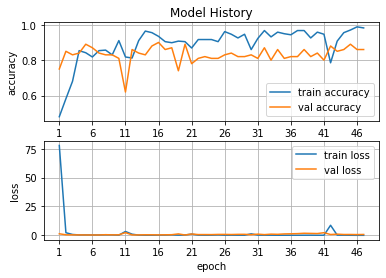

In [26]:
import pandas as pd

h = pd.DataFrame(history.history)
h['epoch'] = h.index + 1


plt.subplot(2, 1, 1)
plt.plot(h['epoch'], h['accuracy'], h['epoch'], h['val_accuracy'])
plt.title('Model History')
plt.ylabel('accuracy')
plt.grid(True)
plt.legend(('train accuracy', 'val accuracy'),
           loc='lower right')
ax1 = plt.gca()
ax1.set_xticks(range(1, max(h['epoch'])+1, 5))


plt.subplot(2, 1, 2)
plt.plot(h['epoch'], h['loss'], h['epoch'], h['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid(True)
plt.legend(('train loss', 'val loss'),
           loc='upper right')
ax2 = plt.gca()
ax2.set_xticks(range(1, max(h['epoch'])+1, 5))

plt.show()

#  Image Predictor (Functions)

In [27]:
def predict_image_util(final_pred_inv):
    img_test = (final_pred_inv[0].reshape((1, min_hw[0], min_hw[1], 1)))  
    raw_predicted_label = model.predict(img_test, batch_size=None, verbose=0, steps=None)[0][0]
    
    predicted_label=1;    
    if(raw_predicted_label < 0.8):
        predicted_label=0
        
    predicted_label_str='Crack'    
    if(predicted_label==0):
        predicted_label_str='No Crack'
        
    print('Raw Predicted Label(Numeric): '+str(raw_predicted_label))
    print('\nPredicted Label : '+predicted_label_str)    

In [28]:
from_data_dir = 'data/src/'  #Directory

def predict_image2(type_, num):
    
    pred_data_colr_, pred_data_inv_ = create_data(from_data_dir, type_, num, num+1, 'Predictable')
    
    ret,thresh = cv2.threshold(pred_data_colr_[0],127,255,cv2.THRESH_BINARY_INV)
    contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    cv2.drawContours( pred_data_colr_[0], contours, -1, (255,0,0), 3, cv2.LINE_AA, hierarchy, 1 )
    
    plt.imshow(pred_data_colr_[0])
    pred_data_colr =[]
    pred_data_inv = []
    
    pred_data_inv.append(pred_data_inv_[0])
    pred_data_colr.append(pred_data_colr_[0])
    
    final_pred_colr = np.array(pred_data_colr).reshape(((len(pred_data_colr), min_hw[0], min_hw[1], 1)))  
    final_pred_inv = np.array(pred_data_inv).reshape(((len(pred_data_inv), min_hw[0], min_hw[1], 1)))
    predict_image_util(final_pred_inv)
    

#  Image Predictor

Working On Predictable Data : crack

Images Processed from 00115 to 00116

Raw Predicted Label(Numeric): 1.0

Predicted Label : Crack


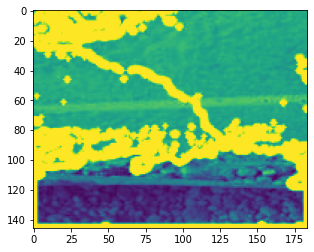

In [29]:
predict_image2('crack', 115)

#  Saving Model

In [30]:
model.save_weights('third_30_weights.h5')
model.save('third_30.h5')

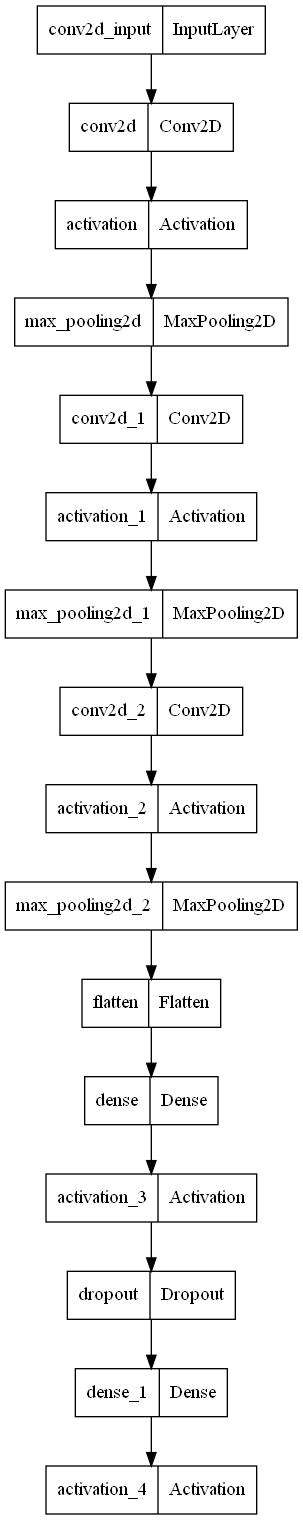

In [31]:
plot_model(
    model,
    to_file="model.png",
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)

In [96]:
file = '3.jpg'
img = Image.open(file)
img = img.resize(min_hw)
img.save(file)

In [97]:
image = cv2.imread(file, 0)
bi_inv, colored_img = process_image(image)

In [98]:
image.shape

(146, 184)

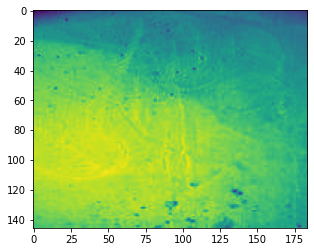

In [99]:
plt.imshow(colored_img)

In [100]:
img_test = (colored_img.reshape((1, min_hw[0], min_hw[1], 1)))  
model.predict(img_test, batch_size=None, verbose=0, steps=None)[0][0]

0.808864